In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [2]:
warnings.filterwarnings("ignore")

In [136]:
df = pd.read_csv(r"C:\Users\HP\Desktop\titanic\Udacity_final.csv",encoding='mac_roman')
df

,Course_Name,Organization,Level,Rating,Link,About,Skills
0,Data Engineer,School of Data Science,Intermediate,4.6,https://www.udacity.com//course/data-engineer-...,Data Engineering is the foundation for the new...,"Data Modeling, Data Pipelines, Data Lakes, Spa..."
1,Data Scientist,School of Data Science,advanced,4.7,https://www.udacity.com//course/data-scientist...,"Build effective machine learning models, run d...","Machine Learning, Deep Learning, Software Engi..."
2,Data Analyst,School of Data Science,Intermediate,4.6,https://www.udacity.com//course/data-analyst-n...,"Use Python, SQL, and statistics to uncover ins...","Data Wrangling, Matplotlib, Bootstrapping, Pan..."
3,C++,School of Autonomous Systems,Intermediate,4.6,https://www.udacity.com//course/c-plus-plus-na...,Get hands-on experience by building five real-...,"Data Structures &amp; Algorithms, Memory Manag..."
4,Product Manager,School of Product Management,Beginner,4.7,https://www.udacity.com//course/product-manage...,Envision and execute the development of indust...,"Product Strategy, Product Design, Product Deve..."
...,...,...,...,...,...,...,...
258,Front-End Interview Prep,Career Advancement,Intermediate,None,https://www.udacity.com//course/front-end-inte...,Answer front-end technical and behavioral inte...,"Interview questions, Common FE Questions, Whit..."
259,Full-Stack Interview Prep,Career Advancement,Intermediate,None,https://www.udacity.com//course/full-stack-int...,Answer common full stack and web security inte...,"Interview practice, Common FS Questions, White..."
260,Data Structures & Algorithms in Swift,Career Advancement,Intermediate,None,https://www.udacity.com//course/data-structure...,Review and practice the skills technical inter...,"Interview practice, Swift, Data structures, Ca..."
261,iOS Interview Prep,Career Advancement,Intermediate,None,https://www.udacity.com//course/ios-interview-...,Answer iOS and mobile development interview qu...,"Interview practice, Common iOS Questions, Whit..."


In [4]:
df.shape

(263, 7)

In [5]:
df.columns

Index(['Course_Name', 'Organization', 'Level', 'Rating', 'Link', 'About',
       'Skills'],
      dtype='object')

In [6]:
df.dtypes

Course_Name     object
Organization    object
Level           object
Rating          object
Link            object
About           object
Skills          object
dtype: object

In [7]:
df.isna().sum()

Course_Name      0
Organization     0
Level            4
Rating           0
Link             0
About            8
Skills          15
dtype: int64

In [8]:
df.Course_Name.value_counts()

Artificial Intelligence                  2
Data Engineer                            1
Object-Oriented JavaScript               1
JavaScript Testing                       1
How to Make a Platformer Using libGDX    1
                                        ..
Eigenvectors and Eigenvalues             1
Intro to Artificial Intelligence         1
Artificial Intelligence for Robotics     1
Intro to Deep Learning with PyTorch      1
VR Interview Prep                        1
Name: Course_Name, Length: 262, dtype: int64

In [9]:
list_courses = list(df.Course_Name.unique())

In [10]:
len(list_courses)

262

In [11]:
list(df.groupby("Organization"))

[('Career Advancement',
                                    Course_Name        Organization  \
  252                   Craft Your Cover Letter  Career Advancement   
  253                       Refresh Your Resume  Career Advancement   
  254  Strengthen Your LinkedIn Network & Brand  Career Advancement   
  255               Data Science Interview Prep  Career Advancement   
  256                    Android Interview Prep  Career Advancement   
  257    Machine Learning Interview Preparation  Career Advancement   
  258                  Front-End Interview Prep  Career Advancement   
  259                 Full-Stack Interview Prep  Career Advancement   
  260     Data Structures & Algorithms in Swift  Career Advancement   
  261                        iOS Interview Prep  Career Advancement   
  262                         VR Interview Prep  Career Advancement   
  
              Level Rating                                               Link  \
  252      Beginner   None  https://www.

In [12]:
df.groupby("Organization").size()

Organization
Career Advancement                      11
School of Artificial Intelligence       42
School of Autonomous Systems            10
School of Business                      16
School of Cloud Computing                9
School of Cybersecurity                  4
School of Data Science                  15
School of Product Management            13
School of Programming & Development    143
dtype: int64

In [13]:
type(df.groupby("Organization").size())

pandas.core.series.Series

In [14]:
count_courses = list(df.groupby("Organization").size())
count_courses

[11, 42, 10, 16, 9, 4, 15, 13, 143]

In [15]:
org_names = ["Career Advancement","School of Artificial Intelligence","School of Autonomous Systems","School of Business","School of Cloud Computing","School of Cybersecurity","School of Data Science","School of Product Management","School of Programming & Development"]
len(org_names)

9

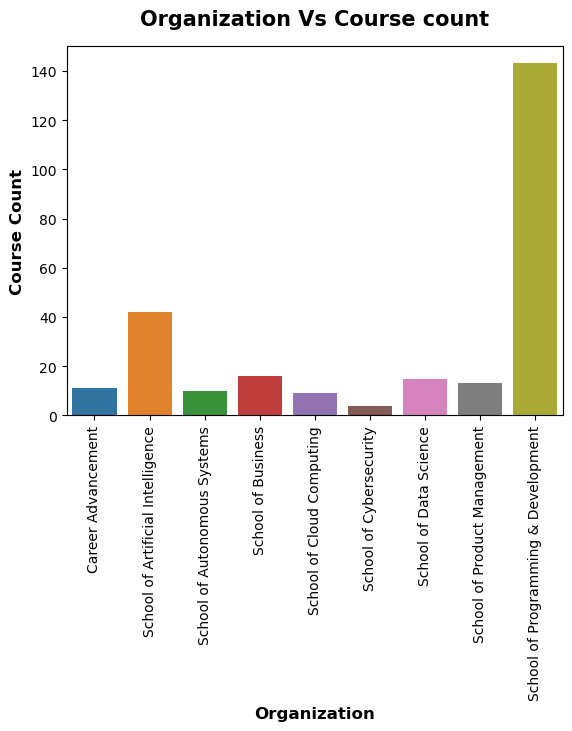

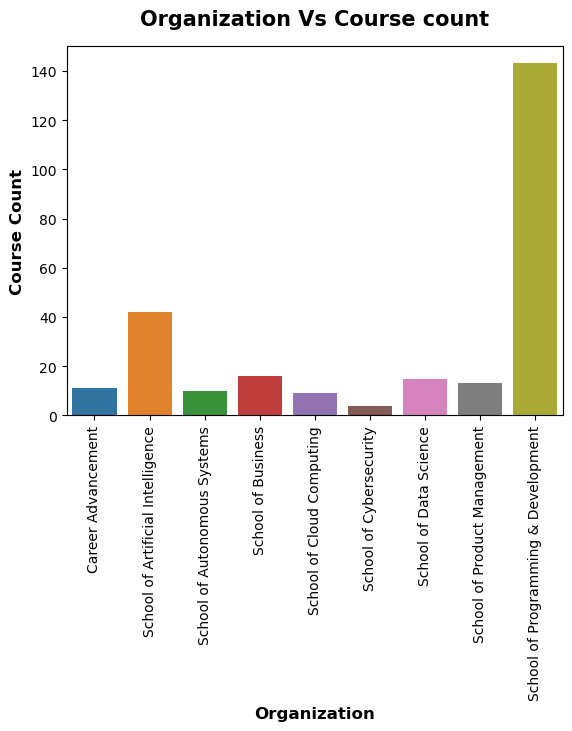

In [196]:
import seaborn as sns

fig,ax = plt.subplots()
sns.barplot(org_names,count_courses,ax=ax)
ax.set_title("Organization Vs Course count",fontdict={"fontweight":"bold","fontsize":15},pad=15.0)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel("Course Count",fontdict={"fontweight":"bold","fontsize":12})
ax.set_xlabel("Organization",fontdict={"fontweight":"bold","fontsize":12})
ax.figure
#fig.savefig("count_organization_courses.png")

In [17]:
df.Organization.unique()

array(['School of Data Science', 'School of Autonomous Systems',
       'School of Product Management', 'School of Business',
       'School of Programming & Development',
       'School of Artificial Intelligence', 'School of Cloud Computing',
       'School of Cybersecurity', 'Career Advancement'], dtype=object)

In [18]:
groupby = df.groupby(["Level"]).agg("count")
groupby

,Course_Name,Organization,Rating,Link,About,Skills
Level,,,,,,
Beginner,65,65,65,65,65,61
Intermediate,150,150,150,150,147,147
advanced,44,44,44,44,43,40


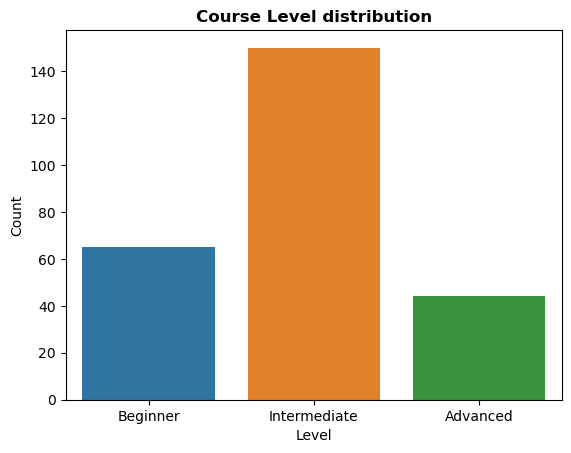

In [19]:
fig,ax = plt.subplots()
sns.barplot(["Beginner","Intermediate","Advanced"],groupby.Course_Name,hue_order=["Beginner","Intermediate","Advanced"])
ax.set_title("Course Level distribution",fontdict={"fontweight":"bold"})
ax.set_xlabel("Level")
ax.set_ylabel("Count");

In [20]:
df.head()

,Course_Name,Organization,Level,Rating,Link,About,Skills
0,Data Engineer,School of Data Science,Intermediate,4.6,https://www.udacity.com//course/data-engineer-...,Data Engineering is the foundation for the new...,"Data Modeling, Data Pipelines, Data Lakes, Spa..."
1,Data Scientist,School of Data Science,advanced,4.7,https://www.udacity.com//course/data-scientist...,"Build effective machine learning models, run d...","Machine Learning, Deep Learning, Software Engi..."
2,Data Analyst,School of Data Science,Intermediate,4.6,https://www.udacity.com//course/data-analyst-n...,"Use Python, SQL, and statistics to uncover ins...","Data Wrangling, Matplotlib, Bootstrapping, Pan..."
3,C++,School of Autonomous Systems,Intermediate,4.6,https://www.udacity.com//course/c-plus-plus-na...,Get hands-on experience by building five real-...,"Data Structures &amp; Algorithms, Memory Manag..."
4,Product Manager,School of Product Management,Beginner,4.7,https://www.udacity.com//course/product-manage...,Envision and execute the development of indust...,"Product Strategy, Product Design, Product Deve..."


In [21]:
df.groupby(["Organization"]).agg({"Rating":"mean"})

TypeError: Could not convert NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNone to numeric

In [22]:
df.Rating.unique()

array(['4.6', '4.7', '4.5', 'None', '4.4', '4.3', '4.8', '4.2'],
      dtype=object)

In [23]:
df['Rating'].replace('None', np.nan, inplace=True)

In [24]:
df.Rating.unique()

array(['4.6', '4.7', '4.5', nan, '4.4', '4.3', '4.8', '4.2'], dtype=object)

In [25]:
df.Rating.isna().sum()

208

In [26]:
df.Rating.fillna(0,inplace=True)

In [27]:
df.Rating.isna().sum()

0

In [28]:
df.groupby(["Organization"]).agg({"Rating":"mean"})

TypeError: can only concatenate str (not "int") to str

In [29]:
df.Rating = df.Rating.astype("float")

In [30]:
df.Rating.dtype

dtype('float64')

In [31]:
df.groupby(["Level"]).agg({"Rating":"mean"})

,Rating
Level,
Beginner,1.141538
Intermediate,0.788667
advanced,1.352273


In [32]:
df.shape

(263, 7)

In [33]:
df.Rating.value_counts()

0.0    208
4.6     19
4.7     17
4.5      7
4.4      7
4.3      2
4.8      2
4.2      1
Name: Rating, dtype: int64

In [34]:
grpLevels_avgRating= df.groupby(["Organization","Level"]).agg({"Course_Name":"count","Rating":"mean"})
grpLevels_avgRating

Course_Name    Rating
Organization                        Level                              
Career Advancement                  Beginner                3  0.000000
                                    Intermediate            8  0.000000
School of Artificial Intelligence   Beginner                4  1.150000
                                    Intermediate           26  1.069231
                                    advanced               11  2.518182
School of Autonomous Systems        Beginner                1  0.000000
                                    Intermediate            4  2.300000
                                    advanced                5  2.760000
School of Business                  Beginner                7  2.671429
                                    Intermediate            9  1.000000
School of Cloud Computing           Beginner                1  0.000000
                                    Intermediate            7  2.557143
                                    advanced                1  4.600000
School of Cybersecurity             Beginner                1  4.500000
                                    Intermediate            2  0.000000
                                    advanced                1  0.000000
School of Data Science              Beginner                7  2.000000
                                    Intermediate            5  1.840000
                                    advanced                3  4.466667
School of Product Management        Beginner                5  3.660000
                                    Intermediate            8  0.550000
School of Programming & Development Beginner               36  0.391667
                                    Intermediate           81  0.503704
                                    advanced               23  0.000000

In [35]:
type(grpLevels_avgRating)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Organization,Level'>

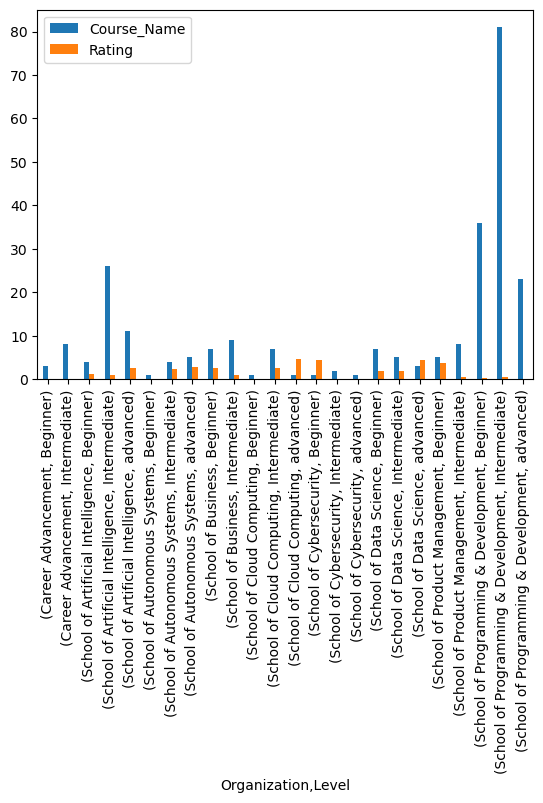

In [36]:
df.groupby(["Organization","Level"]).agg({"Course_Name":"count","Rating":"mean"}).plot(kind="bar")

In [37]:
df.groupby(["Organization","Level"]).agg({"Course_Name":"count","Rating":"mean"}).sort_values(by="Course_Name",ascending=False)

Course_Name    Rating
Organization                        Level                              
School of Programming & Development Intermediate           81  0.503704
                                    Beginner               36  0.391667
School of Artificial Intelligence   Intermediate           26  1.069231
School of Programming & Development advanced               23  0.000000
School of Artificial Intelligence   advanced               11  2.518182
School of Business                  Intermediate            9  1.000000
School of Product Management        Intermediate            8  0.550000
Career Advancement                  Intermediate            8  0.000000
School of Cloud Computing           Intermediate            7  2.557143
School of Business                  Beginner                7  2.671429
School of Data Science              Beginner                7  2.000000
                                    Intermediate            5  1.840000
School of Autonomous Systems        advanced                5  2.760000
School of Product Management        Beginner                5  3.660000
School of Autonomous Systems        Intermediate            4  2.300000
School of Artificial Intelligence   Beginner                4  1.150000
School of Data Science              advanced                3  4.466667
Career Advancement                  Beginner                3  0.000000
School of Cybersecurity             Intermediate            2  0.000000
                                    advanced                1  0.000000
                                    Beginner                1  4.500000
School of Cloud Computing           Beginner                1  0.000000
School of Autonomous Systems        Beginner                1  0.000000
School of Cloud Computing           advanced                1  4.600000

In [38]:
oo = df.groupby(["Organization","Level"]).agg({"Course_Name":"count"}).sort_values(by="Course_Name",ascending=False)

In [39]:
oo.unstack("Organization",fill_value=0)

Course_Name                                    \
Organization Career Advancement School of Artificial Intelligence   
Level                                                               
Beginner                      3                                 4   
Intermediate                  8                                26   
advanced                      0                                11   

                                                              \
Organization School of Autonomous Systems School of Business   
Level                                                          
Beginner                                1                  7   
Intermediate                            4                  9   
advanced                                5                  0   

                                                                \
Organization School of Cloud Computing School of Cybersecurity   
Level                                                            
Beginner                             1                       1   
Intermediate                         7                       2   
advanced                             1                       1   

                                                                  \
Organization School of Data Science School of Product Management   
Level                                                              
Beginner                          7                            5   
Intermediate                      5                            8   
advanced                          3                            0   

                                                  
Organization School of Programming & Development  
Level                                             
Beginner                                      36  
Intermediate                                  81  
advanced                                      23

In [40]:
ds  = oo.unstack("Organization",fill_value=0).T

In [41]:
ds

Level                                            Beginner  Intermediate  \
            Organization                                                  
Course_Name Career Advancement                          3             8   
            School of Artificial Intelligence           4            26   
            School of Autonomous Systems                1             4   
            School of Business                          7             9   
            School of Cloud Computing                   1             7   
            School of Cybersecurity                     1             2   
            School of Data Science                      7             5   
            School of Product Management                5             8   
            School of Programming & Development        36            81   

Level                                            advanced  
            Organization                                   
Course_Name Career Advancement                          0  
            School of Artificial Intelligence          11  
            School of Autonomous Systems                5  
            School of Business                          0  
            School of Cloud Computing                   1  
            School of Cybersecurity                     1  
            School of Data Science                      3  
            School of Product Management                0  
            School of Programming & Development        23

In [42]:
ds.columns

Index(['Beginner', 'Intermediate', 'advanced'], dtype='object', name='Level')

In [43]:
oo1 = df.groupby(["Organization","Level"]).agg({"Level":"count"})
oo1.head()

Level
Organization                      Level              
Career Advancement                Beginner          3
                                  Intermediate      8
School of Artificial Intelligence Beginner          4
                                  Intermediate     26
                                  advanced         11

In [44]:
oo2 =oo1.unstack("Level",fill_value=0)
oo2

Level                      
Level                               Beginner Intermediate advanced
Organization                                                      
Career Advancement                         3            8        0
School of Artificial Intelligence          4           26       11
School of Autonomous Systems               1            4        5
School of Business                         7            9        0
School of Cloud Computing                  1            7        1
School of Cybersecurity                    1            2        1
School of Data Science                     7            5        3
School of Product Management               5            8        0
School of Programming & Development       36           81       23

In [45]:
oo2.columns

MultiIndex([('Level',     'Beginner'),
            ('Level', 'Intermediate'),
            ('Level',     'advanced')],
           names=[None, 'Level'])

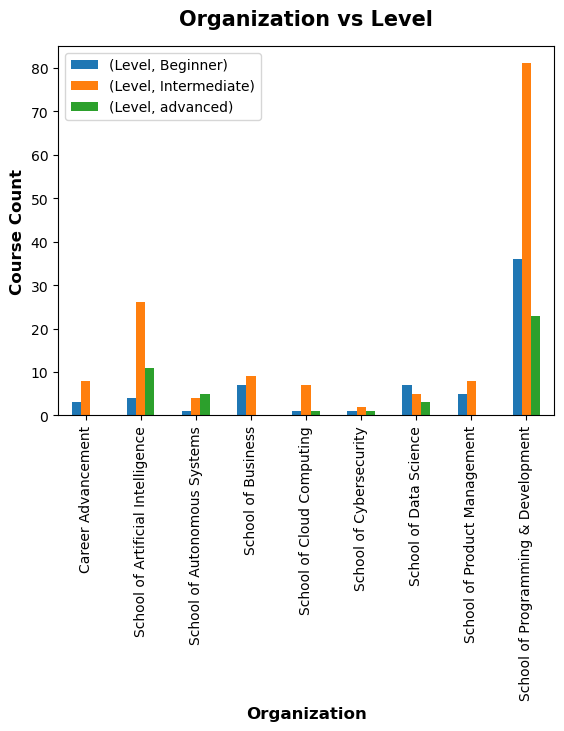

In [201]:
oo2.plot(kind="bar");
plt.title("Organization vs Level",fontdict={"fontweight":"bold","fontsize":15},pad=15.0)
plt.ylabel("Course Count",fontdict={"fontweight":"bold","fontsize":12})
plt.xlabel("Organization",fontdict={"fontweight":"bold","fontsize":12})
plt.legend();

In [47]:
df.head()

,Course_Name,Organization,Level,Rating,Link,About,Skills
0,Data Engineer,School of Data Science,Intermediate,4.6,https://www.udacity.com//course/data-engineer-...,Data Engineering is the foundation for the new...,"Data Modeling, Data Pipelines, Data Lakes, Spa..."
1,Data Scientist,School of Data Science,advanced,4.7,https://www.udacity.com//course/data-scientist...,"Build effective machine learning models, run d...","Machine Learning, Deep Learning, Software Engi..."
2,Data Analyst,School of Data Science,Intermediate,4.6,https://www.udacity.com//course/data-analyst-n...,"Use Python, SQL, and statistics to uncover ins...","Data Wrangling, Matplotlib, Bootstrapping, Pan..."
3,C++,School of Autonomous Systems,Intermediate,4.6,https://www.udacity.com//course/c-plus-plus-na...,Get hands-on experience by building five real-...,"Data Structures &amp; Algorithms, Memory Manag..."
4,Product Manager,School of Product Management,Beginner,4.7,https://www.udacity.com//course/product-manage...,Envision and execute the development of indust...,"Product Strategy, Product Design, Product Deve..."


In [48]:
df.groupby("Course_Name").count().sort_values("Course_Name",ascending=False)

,Organization,Level,Rating,Link,About,Skills
Course_Name,,,,,,
iOS Persistence and Core Data,1,1,1,1,1,1
iOS Networking with Swift,1,1,1,1,1,1
iOS Interview Prep,1,1,1,1,1,1
iOS Developer,1,1,1,1,1,1
iOS Design Patterns,1,1,1,1,1,0
...,...,...,...,...,...,...
AI Product Manager,1,1,1,1,1,1
AI Fundamentals,1,1,1,1,1,1
A/B Testing for Business Analysts,1,1,1,1,1,1


In [49]:
df.Skills.unique()

array(['Data Modeling, Data Pipelines, Data Lakes, Spark, Airflow',
       'Machine Learning, Deep Learning, Software Engineering',
       'Data Wrangling, Matplotlib, Bootstrapping, Pandas &amp; NumPy, Statistics',
       'Data Structures &amp; Algorithms, Memory Management, Concurrency, Object-oriented Programming, C++',
       'Product Strategy, Product Design, Product Development, Design Sprint, Product Launch',
       'Excel &amp; Spreadsheets, SQL, Data Visualization, Data Dashboards',
       'Introduction to Programming, HTML, CSS, Python',
       'Digital Marketing, Social Media Marketing, Facebook Marketing, Search Engine Optimization, Search Engine Marketing, Display Ads, Search Ads',
       'Deep Learning,  Neural Networks,  Jupyter Notebooks,  CNNs,  GANs',
       'Ethereum Blockchain, Blockchain Architecture, Data Auditing',
       'User Research, User Experience, Prototyping, Interactive Design, User Interface Design, Usability Testing',
       'Momentum Trading Strategy,

In [50]:
df_Skills = df

In [51]:
df_Skills["Skills"] = df_Skills["Skills"].str.split(",")
df_Skills

,Course_Name,Organization,Level,Rating,Link,About,Skills
0,Data Engineer,School of Data Science,Intermediate,4.6,https://www.udacity.com//course/data-engineer-...,Data Engineering is the foundation for the new...,"[Data Modeling, Data Pipelines, Data Lakes, ..."
1,Data Scientist,School of Data Science,advanced,4.7,https://www.udacity.com//course/data-scientist...,"Build effective machine learning models, run d...","[Machine Learning, Deep Learning, Software E..."
2,Data Analyst,School of Data Science,Intermediate,4.6,https://www.udacity.com//course/data-analyst-n...,"Use Python, SQL, and statistics to uncover ins...","[Data Wrangling, Matplotlib, Bootstrapping, ..."
3,C++,School of Autonomous Systems,Intermediate,4.6,https://www.udacity.com//course/c-plus-plus-na...,Get hands-on experience by building five real-...,"[Data Structures &amp; Algorithms, Memory Man..."
4,Product Manager,School of Product Management,Beginner,4.7,https://www.udacity.com//course/product-manage...,Envision and execute the development of indust...,"[Product Strategy, Product Design, Product D..."
...,...,...,...,...,...,...,...
258,Front-End Interview Prep,Career Advancement,Intermediate,0.0,https://www.udacity.com//course/front-end-inte...,Answer front-end technical and behavioral inte...,"[Interview questions, Common FE Questions, W..."
259,Full-Stack Interview Prep,Career Advancement,Intermediate,0.0,https://www.udacity.com//course/full-stack-int...,Answer common full stack and web security inte...,"[Interview practice, Common FS Questions, Wh..."
260,Data Structures & Algorithms in Swift,Career Advancement,Intermediate,0.0,https://www.udacity.com//course/data-structure...,Review and practice the skills technical inter...,"[Interview practice, Swift, Data structures,..."
261,iOS Interview Prep,Career Advancement,Intermediate,0.0,https://www.udacity.com//course/ios-interview-...,Answer iOS and mobile development interview qu...,"[Interview practice, Common iOS Questions, W..."


In [52]:
df_Skills = df_Skills.explode("Skills")
df_Skills

,Course_Name,Organization,Level,Rating,Link,About,Skills
0,Data Engineer,School of Data Science,Intermediate,4.6,https://www.udacity.com//course/data-engineer-...,Data Engineering is the foundation for the new...,Data Modeling
0,Data Engineer,School of Data Science,Intermediate,4.6,https://www.udacity.com//course/data-engineer-...,Data Engineering is the foundation for the new...,Data Pipelines
0,Data Engineer,School of Data Science,Intermediate,4.6,https://www.udacity.com//course/data-engineer-...,Data Engineering is the foundation for the new...,Data Lakes
0,Data Engineer,School of Data Science,Intermediate,4.6,https://www.udacity.com//course/data-engineer-...,Data Engineering is the foundation for the new...,Spark
0,Data Engineer,School of Data Science,Intermediate,4.6,https://www.udacity.com//course/data-engineer-...,Data Engineering is the foundation for the new...,Airflow
...,...,...,...,...,...,...,...
261,iOS Interview Prep,Career Advancement,Intermediate,0.0,https://www.udacity.com//course/ios-interview-...,Answer iOS and mobile development interview qu...,Career Advancement
262,VR Interview Prep,Career Advancement,Intermediate,0.0,https://www.udacity.com//course/vr-interview-p...,Learn how to tackle interview questions for te...,Interview practice
262,VR Interview Prep,Career Advancement,Intermediate,0.0,https://www.udacity.com//course/vr-interview-p...,Learn how to tackle interview questions for te...,Common VR Questions
262,VR Interview Prep,Career Advancement,Intermediate,0.0,https://www.udacity.com//course/vr-interview-p...,Learn how to tackle interview questions for te...,Whiteboarding


In [53]:
df.Skills.unique

<bound method Series.unique of 0      [Data Modeling,  Data Pipelines,  Data Lakes, ...
1      [Machine Learning,  Deep Learning,  Software E...
2      [Data Wrangling,  Matplotlib,  Bootstrapping, ...
3      [Data Structures &amp; Algorithms,  Memory Man...
4      [Product Strategy,  Product Design,  Product D...
                             ...                        
258    [Interview questions,  Common FE Questions,  W...
259    [Interview practice,  Common FS Questions,  Wh...
260    [Interview practice,  Swift,  Data structures,...
261    [Interview practice,  Common iOS Questions,  W...
262    [Interview practice,  Common VR Questions,  Wh...
Name: Skills, Length: 263, dtype: object>

In [54]:
df.Skills.isna().sum()

15

In [55]:
df["Skills"].fillna("abcd",inplace=True)

In [56]:
df.Skills.isna().sum()

0

In [57]:
newdf = df[df["Skills"].str.contains("Machine Learning").fillna(False)]
len(newdf)

0

In [58]:
df.Skills.isna().sum()

0

In [59]:
df

,Course_Name,Organization,Level,Rating,Link,About,Skills
0,Data Engineer,School of Data Science,Intermediate,4.6,https://www.udacity.com//course/data-engineer-...,Data Engineering is the foundation for the new...,"[Data Modeling, Data Pipelines, Data Lakes, ..."
1,Data Scientist,School of Data Science,advanced,4.7,https://www.udacity.com//course/data-scientist...,"Build effective machine learning models, run d...","[Machine Learning, Deep Learning, Software E..."
2,Data Analyst,School of Data Science,Intermediate,4.6,https://www.udacity.com//course/data-analyst-n...,"Use Python, SQL, and statistics to uncover ins...","[Data Wrangling, Matplotlib, Bootstrapping, ..."
3,C++,School of Autonomous Systems,Intermediate,4.6,https://www.udacity.com//course/c-plus-plus-na...,Get hands-on experience by building five real-...,"[Data Structures &amp; Algorithms, Memory Man..."
4,Product Manager,School of Product Management,Beginner,4.7,https://www.udacity.com//course/product-manage...,Envision and execute the development of indust...,"[Product Strategy, Product Design, Product D..."
...,...,...,...,...,...,...,...
258,Front-End Interview Prep,Career Advancement,Intermediate,0.0,https://www.udacity.com//course/front-end-inte...,Answer front-end technical and behavioral inte...,"[Interview questions, Common FE Questions, W..."
259,Full-Stack Interview Prep,Career Advancement,Intermediate,0.0,https://www.udacity.com//course/full-stack-int...,Answer common full stack and web security inte...,"[Interview practice, Common FS Questions, Wh..."
260,Data Structures & Algorithms in Swift,Career Advancement,Intermediate,0.0,https://www.udacity.com//course/data-structure...,Review and practice the skills technical inter...,"[Interview practice, Swift, Data structures,..."
261,iOS Interview Prep,Career Advancement,Intermediate,0.0,https://www.udacity.com//course/ios-interview-...,Answer iOS and mobile development interview qu...,"[Interview practice, Common iOS Questions, W..."


In [60]:
list_skills = ["Computer Vision","TensorFlow","Machine Learning","Data Structures","Android Development","Interview practice"]
len(list_skills)

6

In [61]:
newdf = pd.DataFrame()

In [160]:
ml = df[df["Skills"].str.contains("Machine Learning").fillna(False)]
ml

,Course_Name,Organization,Level,Rating,Link,About,Skills
1,Data Scientist,School of Data Science,advanced,4.7,https://www.udacity.com//course/data-scientist...,"Build effective machine learning models, run d...","Machine Learning, Deep Learning, Software Engi..."
12,Machine Learning Engineer,School of Artificial Intelligence,Intermediate,4.6,https://www.udacity.com//course/machine-learni...,Become a machine learning engineer and apply p...,"Machine Learning, Supervised Learning, Unsuper..."
17,Machine Learning DevOps Engineer,School of Artificial Intelligence,advanced,None,https://www.udacity.com//course/machine-learni...,"In this program,you will build theDevOps skill...","API development, Automated model scoring, CI..."
32,Natural Language Processing,School of Artificial Intelligence,advanced,4.5,https://www.udacity.com//course/natural-langua...,Learn the skills to get computers to understan...,"Machine Learning, Speech Recognition, Sentimen..."
35,Intro to Self-Driving Cars,School of Autonomous Systems,Intermediate,4.6,https://www.udacity.com//course/intro-to-self-...,This introductory program is the perfect way t...,"Computer Vision, Machine Learning, Vehicle Mot..."
40,Intro to Machine Learning with PyTorch,School of Artificial Intelligence,Intermediate,4.7,https://www.udacity.com//course/intro-to-machi...,"Build a solid foundation in Supervised, Unsupe...","Introduction to Machine Learning, Supervised L..."
49,AI for Business Leaders,School of Business,Intermediate,4.6,https://www.udacity.com//course/ai-for-busines...,Master the foundations of artificial intellige...,"Artificial Intelligence, Machine Learning, Bus..."
52,Machine Learning Engineer for Microsoft Azure,School of Artificial Intelligence,Intermediate,4.5,https://www.udacity.com//course/machine-learni...,Strengthen your machine learning skills and bu...,"Azure Machine Learning, Azure Machine Learning..."
61,Data Science for Business Leaders,School of Business,Intermediate,4.4,https://www.udacity.com//course/data-science-f...,"Master the people, platforms, and processes re...","Business Strategy, Data Science, Data Architec..."
73,Introduction to Machine Learning using Microso...,School of Artificial Intelligence,Intermediate,None,https://www.udacity.com//course/introduction-t...,Gain a high-level introduction to the field of...,"Machine Learning, Azure, Model Training, Su..."


In [161]:
ml_orgs =(ml.groupby(["Organization","Level"]).agg({"Level":"count"})).unstack("Level",fill_value=0)
ml_orgs

Level                      
Level                             Beginner Intermediate advanced
Organization                                                    
Career Advancement                       0            1        0
School of Artificial Intelligence        1            8        2
School of Autonomous Systems             0            1        0
School of Business                       0            2        0
School of Data Science                   0            1        1

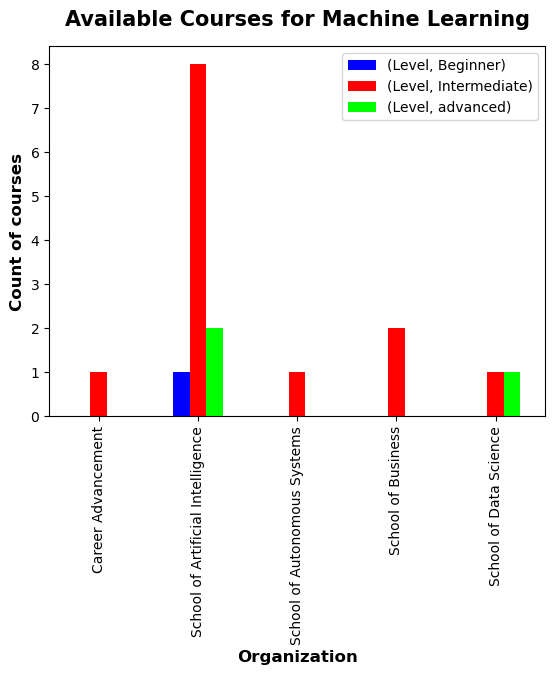

In [202]:
ml_orgs.plot(kind="bar",cmap="brg");
plt.title("Available Courses for Machine Learning",fontdict={"fontweight":"bold","fontsize":15},pad=15.0)
plt.ylabel("Count of courses",fontdict={"fontweight":"bold","fontsize":12});
plt.xlabel("Organization",fontdict={"fontweight":"bold","fontsize":12})
plt.legend();

In [65]:
from matplotlib.colors import ListedColormap

In [66]:
import seaborn as sn
sn.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

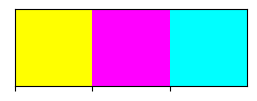

In [67]:
goldsilbronze = [ "#FFFF00","#FF00FF","#00FFFF"]
sn.palplot(sn.color_palette(goldsilbronze))
new_colorpalette=ListedColormap(sn.color_palette(goldsilbronze))

In [147]:
mldl = df[df["Skills"].str.contains("Machine Learning, Deep Learning").fillna(False)]
mldl

,Course_Name,Organization,Level,Rating,Link,About,Skills
1,Data Scientist,School of Data Science,advanced,4.7,https://www.udacity.com//course/data-scientist...,"Build effective machine learning models, run d...","Machine Learning, Deep Learning, Software Engi..."


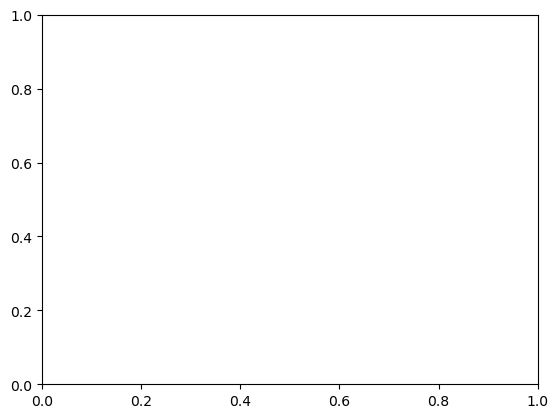

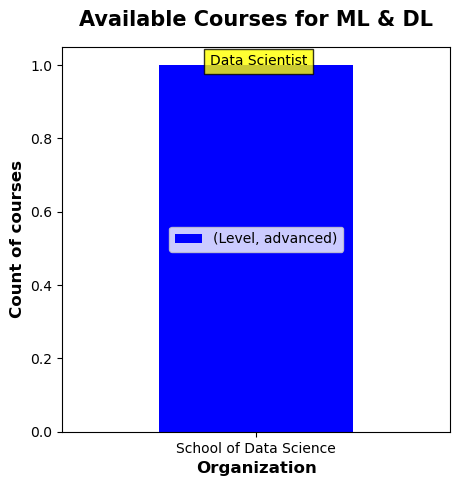

In [264]:

fig,ax = plt.subplots()
ax=mldl.groupby(["Organization","Level"]).agg({"Level":"count"}).unstack("Level",fill_value=0).plot(kind="bar",figsize=(5,5),color="b");
ax.set_title("Available Courses for ML & DL",fontdict={"fontweight":"bold","fontsize":15},pad=15.0)
ax.set_ylabel("Count of courses",fontdict={"fontweight":"bold","fontsize":12})
ax.set_xlabel("Organization",fontdict={"fontweight":"bold","fontsize":12})
ax.set_xticklabels(["School of Data Science"],rotation=0)
ax.text(-0.12,1,"Data Scientist",bbox = dict(facecolor = 'yellow', alpha =.8))
ax.legend(loc='center',borderaxespad=0);

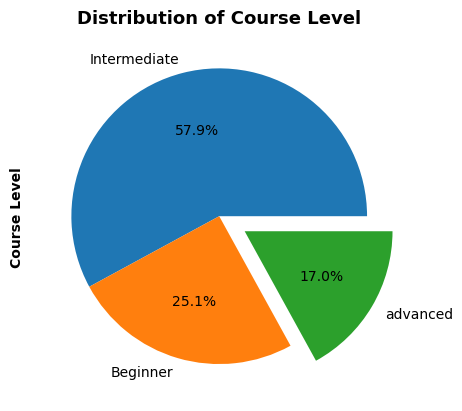

In [228]:
df.Level.value_counts().plot(kind="pie",autopct='%1.1f%%',explode = [0, 0, 0.2])
plt.title("Distribution of Course Level",fontdict={"fontweight":"bold","fontsize":13});
plt.ylabel("Course Level",fontdict={"fontweight":"bold"});

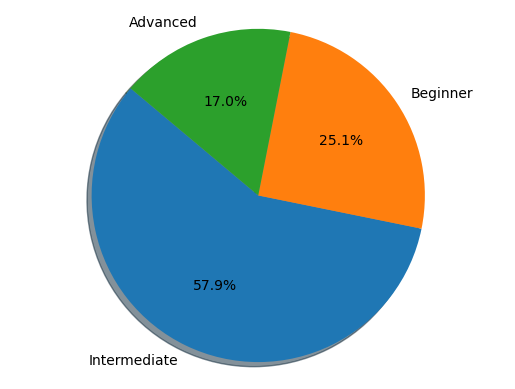

In [225]:
plt.pie(df.Level.value_counts(), labels=["Intermediate","Beginner","Advanced"], autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [78]:
from bs4 import BeautifulSoup
import urllib.request as urllib2
import re

In [79]:
html_page = urllib2.urlopen('https://www.udacity.com//course/data-engineer-nanodegree--nd027')
soup = BeautifulSoup(html_page)
for link in soup.findAll('a', attrs={'href': re.compile("^http://")}):
    print link.get('href')

SyntaxError: invalid syntax (3552446570.py, line 4)

In [82]:
! pip install selenium

     ---------------------------------------- 6.9/6.9 MB 4.2 MB/s eta 0:00:00
     -------------------------------------- 384.9/384.9 kB 5.9 MB/s eta 0:00:00
  Using cached trio_websocket-0.9.2-py3-none-any.whl (16 kB)
  Using cached async_generator-1.10-py3-none-any.whl (18 kB)
     ---------------------------------------- 58.3/58.3 kB 3.2 MB/s eta 0:00:00


In [83]:
from selenium import webdriver
from bs4 import BeautifulSoup
from time import sleep

In [119]:
list_skills = list(df.Link)
list_skills

['https://www.udacity.com//course/data-engineer-nanodegree--nd027',
 'https://www.udacity.com//course/data-scientist-nanodegree--nd025',
 'https://www.udacity.com//course/data-analyst-nanodegree--nd002',
 'https://www.udacity.com//course/c-plus-plus-nanodegree--nd213',
 'https://www.udacity.com//course/product-manager-nanodegree--nd036',
 'https://www.udacity.com//course/business-analytics-nanodegree--nd098',
 'https://www.udacity.com//course/intro-to-programming-nanodegree--nd000',
 'https://www.udacity.com//course/digital-marketing-nanodegree--nd018',
 'https://www.udacity.com//course/deep-learning-nanodegree--nd101',
 'https://www.udacity.com//course/blockchain-developer-nanodegree--nd1309',
 'https://www.udacity.com//course/ux-designer-nanodegree--nd578',
 'https://www.udacity.com//course/ai-for-trading--nd880',
 'https://www.udacity.com//course/machine-learning-engineer-nanodegree--nd009t',
 'https://www.udacity.com//course/ai-programming-python-nanodegree--nd089',
 'https://www.u

In [128]:
# #for i in range(len(list_skills)):
#     driver = webdriver.Chrome(executable_path=r'E:\Download Folder\chromedriver_win32 (1)\chromedriver.exe')
#     url = list_skills[i]
    
#     #driver.get(url)
#     driver.get("https://www.udacity.com/course/java-programming-nanodegree--nd079")
#     sleep(5)
    
#     soup = BeautifulSoup(driver.page_source, "html")
#     data = [] 
#     price = soup.select('#id-205WYjAQyX3wwOqYFjo6pa > div > div > ul > li:nth-child(1) > div > h5')
    
#     data.append(price)
#     driver.close()



In [137]:
df[df["Skills"].str.contains("Machine learning").fillna(False)]

,Course_Name,Organization,Level,Rating,Link,About,Skills


In [112]:
price

[<ins>₹22849</ins>]

In [215]:
ml = df[df["Skills"].str.contains("Interview practice").fillna(False)]
ml

,Course_Name,Organization,Level,Rating,Link,About,Skills
255,Data Science Interview Prep,Career Advancement,Intermediate,None,https://www.udacity.com//course/data-science-i...,Prepare for data science interviews by practic...,"Interview practice, Common Data Questions, Dat..."
256,Android Interview Prep,Career Advancement,Intermediate,None,https://www.udacity.com//course/android-interv...,Learn how to respond to common Android and mob...,"Interview practice, Common Android Questions, ..."
257,Machine Learning Interview Preparation,Career Advancement,Intermediate,None,https://www.udacity.com//course/machine-learni...,"In this course, youíll learn exactly what to e...","Interview practice, Machine Learning, Career A..."
259,Full-Stack Interview Prep,Career Advancement,Intermediate,None,https://www.udacity.com//course/full-stack-int...,Answer common full stack and web security inte...,"Interview practice, Common FS Questions, White..."
260,Data Structures & Algorithms in Swift,Career Advancement,Intermediate,None,https://www.udacity.com//course/data-structure...,Review and practice the skills technical inter...,"Interview practice, Swift, Data structures, Ca..."
261,iOS Interview Prep,Career Advancement,Intermediate,None,https://www.udacity.com//course/ios-interview-...,Answer iOS and mobile development interview qu...,"Interview practice, Common iOS Questions, Whit..."
262,VR Interview Prep,Career Advancement,Intermediate,None,https://www.udacity.com//course/vr-interview-p...,Learn how to tackle interview questions for te...,"Interview practice, Common VR Questions, White..."


In [216]:
ml_orgs =(ml.groupby(["Organization","Level"]).agg({"Level":"count"})).unstack("Level",fill_value=0)
ml_orgs

,Level
Level,Intermediate
Organization,
Career Advancement,7


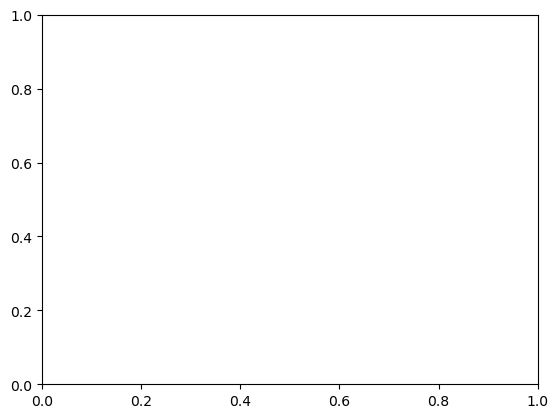

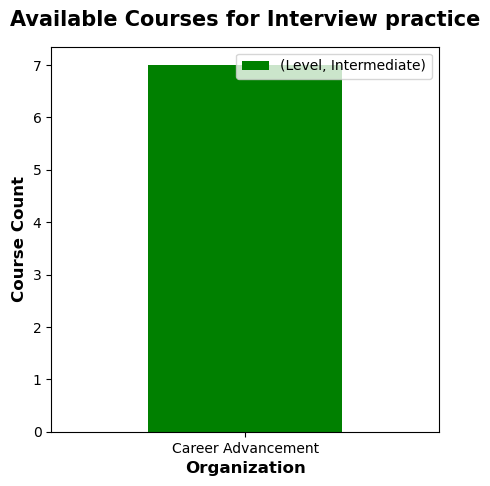

In [219]:
fig,ax = plt.subplots()
ax=ml_orgs.plot(kind="bar",cmap=new_colorpalette,color="g",figsize=(5,5));
ax.set_title("Available Courses for Interview practice",fontdict={"fontweight":"bold","fontsize":15},pad=15.0)
ax.set_ylabel("Course Count",fontdict={"fontweight":"bold","fontsize":12})
ax.set_xlabel("Organization",fontdict={"fontweight":"bold","fontsize":12})
ax.set_xticklabels(["Career Advancement"],rotation=0)
ax.legend();

In [156]:
ml = df[df["Skills"].str.contains("Android Development").fillna(False)]
ml

,Course_Name,Organization,Level,Rating,Link,About,Skills
26,Android Kotlin Developer,School of Programming & Development,Intermediate,4.7,https://www.udacity.com//course/android-kotlin...,"Master Android app development with Kotlin, a ...","Android Development, Kotlin, Android Studio, G..."
54,Android Basics,School of Programming & Development,Beginner,4.8,https://www.udacity.com//course/android-basics...,No programming experience? No Problem! Start d...,"Android Development, Java programming, Android..."
133,Android Basics: Multiscreen Apps,School of Programming & Development,Beginner,None,https://www.udacity.com//course/android-basics...,Learn to build multiple screens and link them ...,"Android Development, Intents and Activities, D..."
137,Android Basics: User Input,School of Programming & Development,Beginner,None,https://www.udacity.com//course/android-basics...,Learn how to make your apps interactive using ...,"Android Development, Java, Object-Oriented Pro..."
138,Android Performance,School of Programming & Development,advanced,None,https://www.udacity.com//course/android-perfor...,"Performance matters to users, so it must matte...","Android Development, Performance, Optimization"
141,Gradle for Android and Java,School of Programming & Development,advanced,None,https://www.udacity.com//course/gradle-for-and...,Build bigger and better Android and Java apps ...,"Android Development, Gradle, Java"
142,Build Native Mobile Apps with Flutter,School of Programming & Development,Intermediate,None,https://www.udacity.com//course/build-native-m...,Learn from experts at Google how to use Flutte...,Android Development
145,Android Basics: User Interface,School of Programming & Development,Beginner,None,https://www.udacity.com//course/android-basics...,Learn how to design your first layout in Andro...,"Android Development, Building Layouts, Android..."
149,advancedAndroid App Development,School of Programming & Development,advanced,None,https://www.udacity.com//course/advanced-andro...,Make your app production-ready by applying adv...,"Android Development, Fragments, Libraries, Fir..."
154,Android Basics: Networking,School of Programming & Development,Beginner,None,https://www.udacity.com//course/android-basics...,This class teaches the basics of networking us...,"Android Development, JSON Parsing, HTTP Networ..."


In [157]:
ml_orgs =(ml.groupby(["Organization","Level"]).agg({"Level":"count"})).unstack("Level",fill_value=0)
ml_orgs

Level                      
Level                               Beginner Intermediate advanced
Organization                                                      
School of Programming & Development        6           10        3

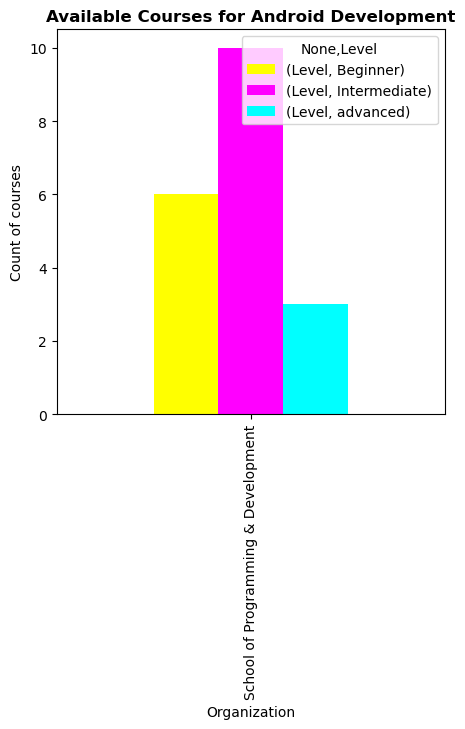

In [159]:
ml_orgs.plot(kind="bar",cmap=new_colorpalette,figsize=(5,5));
plt.title("Available Courses for Android Development",fontdict={"fontweight":"bold"})
plt.ylabel("Count of courses");

In [155]:
df.Skills.unique()

array(['Data Modeling, Data Pipelines, Data Lakes, Spark, Airflow',
       'Machine Learning, Deep Learning, Software Engineering',
       'Data Wrangling, Matplotlib, Bootstrapping, Pandas &amp; NumPy, Statistics',
       'Data Structures &amp; Algorithms, Memory Management, Concurrency, Object-oriented Programming, C++',
       'Product Strategy, Product Design, Product Development, Design Sprint, Product Launch',
       'Excel &amp; Spreadsheets, SQL, Data Visualization, Data Dashboards',
       'Introduction to Programming, HTML, CSS, Python',
       'Digital Marketing, Social Media Marketing, Facebook Marketing, Search Engine Optimization, Search Engine Marketing, Display Ads, Search Ads',
       'Deep Learning,  Neural Networks,  Jupyter Notebooks,  CNNs,  GANs',
       'Ethereum Blockchain, Blockchain Architecture, Data Auditing',
       'User Research, User Experience, Prototyping, Interactive Design, User Interface Design, Usability Testing',
       'Momentum Trading Strategy,